# Notebooks Imports and Packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff

from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#As we are gonna do some plotting, we put this statement 
# so it will be easier to export them:
%matplotlib inline 

# Example 1 - A simple cost function

### $$f(x) = x^2 + x + 1$$

In [4]:
def f(x):
    return x**2+x+1

In [5]:
#MAKE (Generate) DATA
x_1 = np.linspace(start = -3, stop = 3, num = 500)

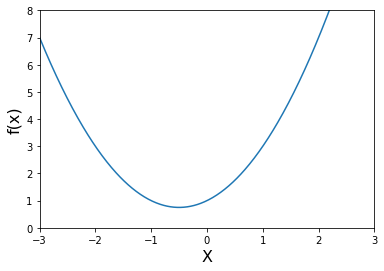

In [6]:
#Plot
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1, f(x_1))
plt.show()

Let's suppose f(x) is our COST FUNCTION, so we want to find the x that min f(x)

## Slopes & Derivatives 


In [7]:
def df(x):
    return 2*x + 1

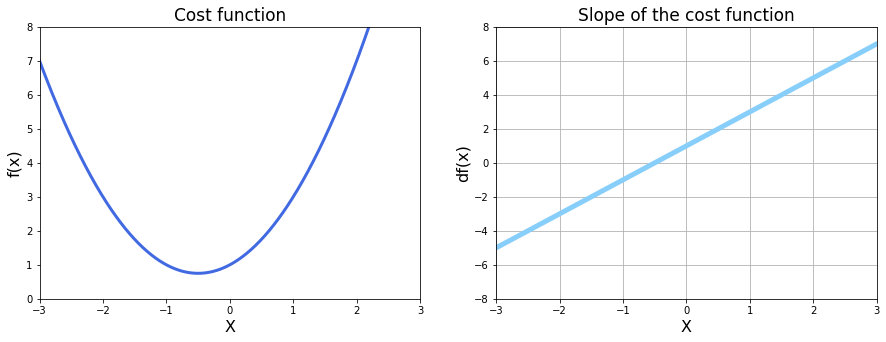

In [8]:
#Plot function and derivative side by side

plt.figure(figsize=[15, 5])

#1st Chart: Cost function
plt.subplot(1,2,1)  
#En una estructura de una fila y dos columnas, 
# es la primera figura

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1, f(x_1), color ='royalblue', linewidth = 3)

#2nd Chart: Derivative
plt.subplot(1,2,2)

plt.xlim(-3,3)
plt.ylim(-8,8)

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.grid()
plt.plot(x_1, df(x_1), color ='lightskyblue', linewidth = 5)

plt.show()

## Gradient Descent

(Gradient = slope and you can also find Gradient Descent as Steepest Descent that is an optimization algorithm to find the minimun of a function)

Thinking on the problem of the mountain, as you want to descent (take a step) where the slope is the steepest, you have to go in the direction of the negative of the gradient

In [9]:
#Gradient Descent

new_x = 3
previous_x = 0           #Temporary Value, I think we never use this first value
step_multiplier = 0.1    #= Learning Rate or Multiplier, how far do we take the step
precision = 0.00001      #error

x_list = [new_x]
slope_list = [df(new_x)]


for n in range(500):
    previous_x = new_x
    #2nd: we calculate the error to know how far we are from the minimun (0,007 better tan 700, as 0 is the minimun)
    gradient = df(previous_x)
    #3rd: Learning state
    new_x = previous_x - step_multiplier * gradient #We use - as we are going down the hill
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - previous_x)
    #print(step_size)
    if step_size < precision:
        print('The loop runs this many times: ', n)
        break


print('The local minimun occurs at: ', new_x)
print('Slope or df(x) at this point is: ', df(new_x))
print('Cost or f(x) value at this point is: ', f(new_x))

The loop runs this many times:  50
The local minimun occurs at:  -0.49996003706460423
Slope or df(x) at this point is:  7.992587079153068e-05
Cost or f(x) value at this point is:  0.7500000015970362


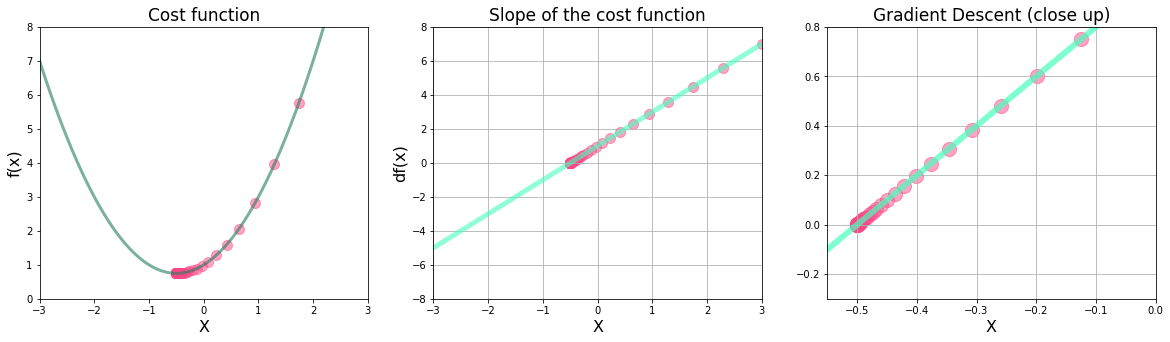

In [10]:
#Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

#1st Chart: Cost function
plt.subplot(1,3,1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1, f(x_1), color ='#227C5C', linewidth = 3, alpha = 0.6)


#scatter does not admit a list (unlike plot: plt.plot(x_1, f(x_1)))
#so we need the TYPE CONVERSION from list to array:
values = np.array(x_list)
plt.scatter(x_list, f(values), color= '#FF4688', s= 100, alpha= 0.5)

#2nd Chart: Derivative
plt.subplot(1,3,2)

plt.xlim(-3,3)
plt.ylim(-8,8)

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.grid()
plt.plot(x_1, df(x_1), color ='#46FFBD', linewidth = 5, alpha= 0.6)

plt.scatter(x_list, slope_list, color= '#FF4688', s= 100, alpha = 0.5) #df(values) were calculated in slope_list

#3rd Chart: Derivative (Close up)
plt.subplot(1,3,3)

plt.xlim(-0.55,0)
plt.ylim(-0.3,0.8)

plt.title('Gradient Descent (close up)', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.plot(x_1, df(x_1), color ='#46FFBD', linewidth = 6, alpha= 0.7)

plt.scatter(x_list, slope_list, color= '#FF4688', s= 200, alpha = 0.5)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced function
### $$ g(x) = x^4 - 4x^2 +5 $$ 

In [11]:
x_2 = np.linspace(-2,2,1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

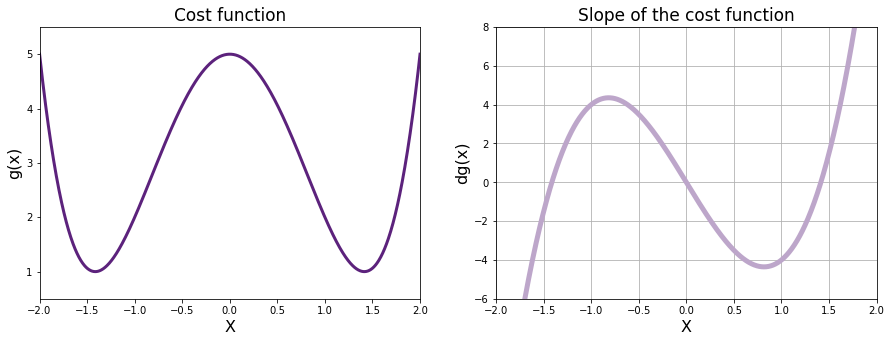

In [12]:
#Plot function and derivative side by side

plt.figure(figsize=[15, 5])

#1st Chart: Cost function
plt.subplot(1,2,1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
plt.plot(x_2, g(x_2), color ='#5C227C', linewidth = 3)

#2nd Chart: Derivative
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
plt.grid()
plt.plot(x_2, dg(x_2), color ='#BDA6CA', linewidth = 5)

plt.show()

## Gradient Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    #We have made the arguments: multiplier and precision optional
    #To index a group of lines you can select them and then: ctrl + ]
    
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]


    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient #We use - as we are going down the hill
    
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
    
        step_size = abs(new_x - previous_x)
        #print(step_size)
        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)

print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  1.4122375085019094
Number of steps:  23


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = -0.5,
                                                 multiplier = 0.01, precision =  0.0001)

print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4137636556157256
Number of steps:  56


In [16]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = -0.5)

print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4122375085019094
Number of steps:  23


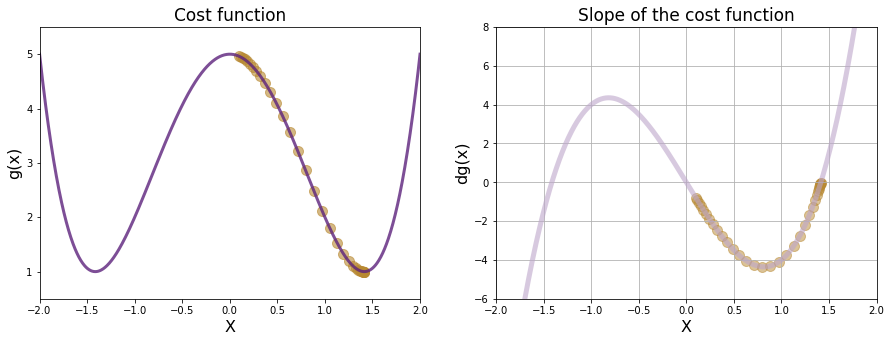

In [17]:
#Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0.1)

#Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

#1st Chart: Cost function
plt.subplot(1,2,1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
plt.plot(x_2, g(x_2), color ='#5C227C', linewidth = 3, alpha= 0.8)

plt.scatter(list_x, g(np.array(list_x)), color= '#B88932', s=100, alpha= 0.6)

#2nd Chart: Derivative
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
plt.grid()
plt.plot(x_2, dg(x_2), color ='#BDA6CA', linewidth = 5, alpha= 0.6)

plt.scatter(list_x, deriv_list, color= '#B88932', s=100, alpha= 0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 -2x^4+2$$

In [18]:
#Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

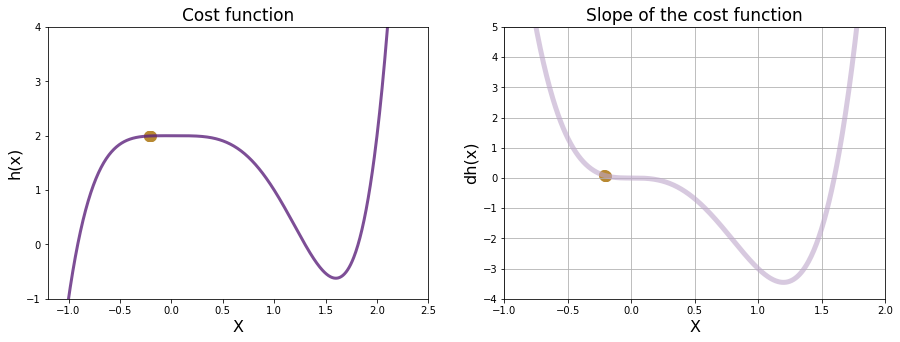

Local min occurs at:  -0.21602892455394987
The cost at the min is:  1.9951736030354685
Number of steps:  11


In [19]:
#Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = -0.2, max_iter = 10)

#Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

#1st Chart: Cost function
plt.subplot(1,2,1)

plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.title('Cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('h(x)', fontsize = 16)
plt.plot(x_3, h(x_3), color ='#5C227C', linewidth = 3, alpha= 0.8)

plt.scatter(list_x, h(np.array(list_x)), color= '#B88932', s=100, alpha= 0.6)

#2nd Chart: Derivative
plt.subplot(1,2,2)

plt.xlim(-1,2)
plt.ylim(-4,5)

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dh(x)', fontsize = 16)
plt.grid()
plt.plot(x_3, dh(x_3), color ='#BDA6CA', linewidth = 5, alpha= 0.6)

plt.scatter(list_x, deriv_list, color= '#B88932', s=100, alpha= 0.5)

plt.show()

print('Local min occurs at: ', local_min)
print('The cost at the min is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [20]:
#To see the maximal number you can work with your computer
import sys
#help(sys)
#sys.version
sys.float_info.max

1.7976931348623157e+308

In [22]:
data_tuple = gradient_descent(derivative_func = dh, initial_guess = -0.2, max_iter = 10)
print('Local min occurs at: ', data_tuple[0])
print('The cost at the min is: ', h(data_tuple[0]))
print('Number of steps: ', len(data_tuple[1]))


Local min occurs at:  -0.21602892455394987
The cost at the min is:  1.9951736030354685
Number of steps:  11


# Example 4 - Data viz with 3D Charts

We want to minimise: $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$
that is:  $$f(x,y)= \frac{1}{r+1}$$  where  $r$  is  $3^{-x^2-y^2}$


In [23]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [24]:
#Make our x and y data
x_4 = np.linspace(start = -2, stop = 2, num = 200)
y_4 = np.linspace(start = -2, stop = 2, num = 200)

    #print('the first x_4 is: ', x_4)
    #print('the first y_4 is: ', y_4)

#type(x_4) --> ndarray
print('Shape of the first X array: ', x_4.shape)
#Shape of X array:  (200,) -> 1 dimensional array with 200 rows, VECTOR!!


#Shift + Tab to show information of a function 


#For the plot_surface we need x_4 and y_4 to be 2d arrays (2 columns):
x_4, y_4 = np.meshgrid(x_4, y_4)
print('Shape of the second X array: ', x_4.shape)
    #print('the second x_4 is: ', x_4)
    #print('the second y_4 is: ', y_4)
#Shape of X array:  (200, 200) -> 2 dim array 200x200, MATRIX

Shape of the first X array:  (200,)
Shape of the second X array:  (200, 200)


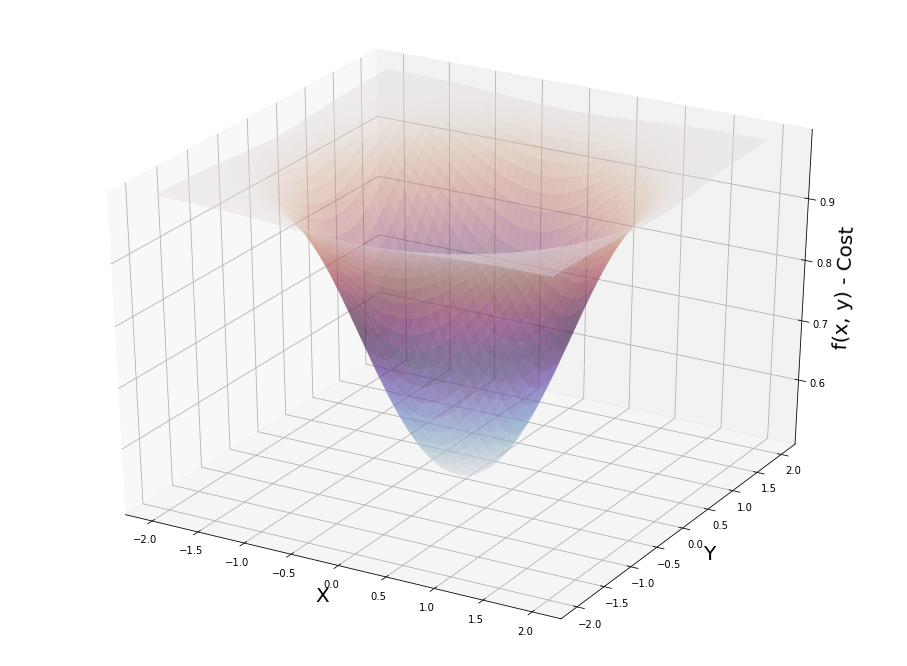

In [25]:
#Generating 3D Plot

fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection='3d')       #Get Current Axis

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.twilight, alpha=0.4)

plt.show()

## Partial Derivatives and Symbolic Computation

//How to calculate a partial derivative with Symbolic Computation in Python

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [26]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))

print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ', 
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary: a,b:keys and 1.8,1.0: their respective values
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [27]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients   #We use the np so we can do this operations easily
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


Now we are gonna do the same but in the tradicional way:

In [28]:
# Partial derivative functions example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [29]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


We can see that this is faster than the other way as it does not calculate the derivative in every loop.
It's your decision to choose what is better.

## Graphing 3D Gradient Descent & Adv. Numpy Arrays

In [30]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

values_array = params #Track the progress of our Gradient Descent,
                      #That is how are our parameters changing as the loop runs
print(values_array.shape)  #(2,) -> 1 dimension with 2 elements (x, y)
#We want 2 dim with 1 element each, so we track x in the first dim, and y in the other:
values_array = params.reshape(1,2) #(num of row, num of columns)
print(values_array.shape)  #(1,2) -> 1 row, 2 columns, 2 dim arrray


for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))
#Comentario prueba de Github

(2,)
(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


Look at: Advanced Numpy Array Practice
in Python intro...

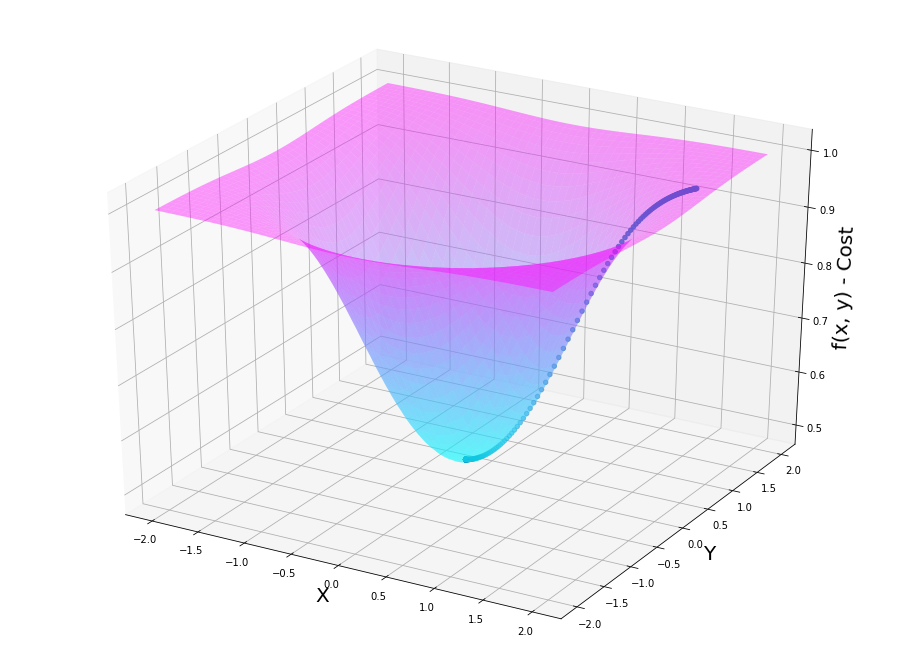

In [31]:
#Generating 3D Plot

fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection='3d')       #Get Current Axis

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.cool, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0],values_array[:, 1]))


plt.show()

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [32]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() #We need 2 dim for LinearRegression()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [33]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])  #Intercept
print('Theta 1:', regr.coef_[0][0])    #slope

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


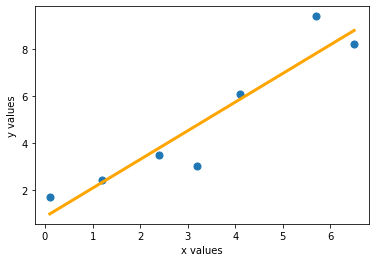

In [34]:
# Plot of the actual values and the estimated values
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [35]:
# y_hat = theta0 + theta1*x  -> estimated values

y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [36]:
def rss(y, y_hat):
    return sum((y-y_hat)**2)

def mse(y, y_hat):
    #return np.average((y - y_hat)**2, axis=0)
    return rss(y, y_hat)/y.size    #y.size = len(y)

print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [37]:
nr_thetas = 200 #number of thetas
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

### Calc MSE using nested for loops

In [38]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

#We calculate the mse for every point in the matrix (that is t0 and t1) and keep the value at plot_cost
for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


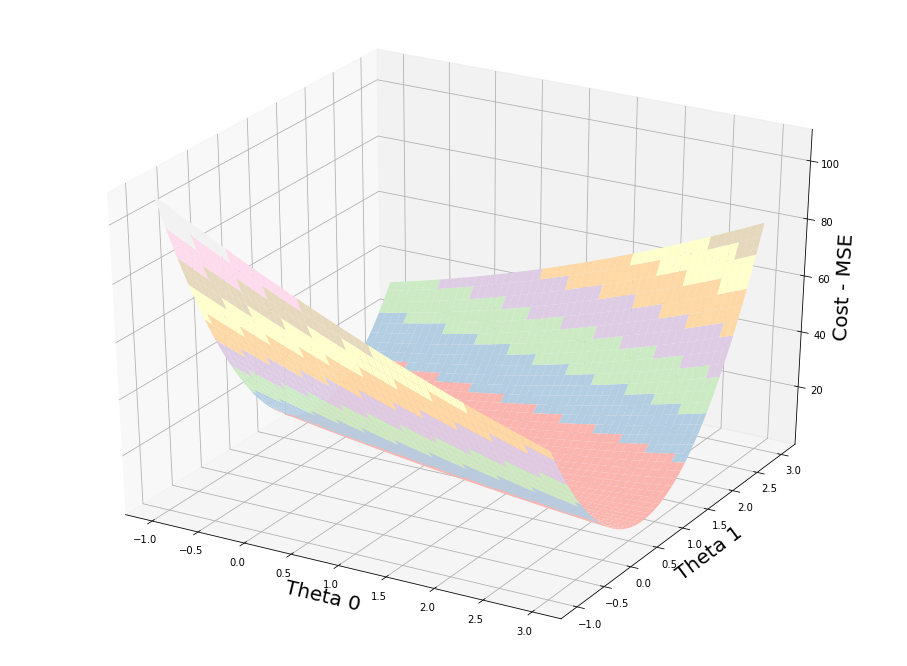

In [39]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.Pastel1)
#Para el color hemos usado el módulo cm que hemos importado antes
plt.show()

In [40]:
#We look for the min valiue of the matrix plot_cost:
print('Min value of plot_cost', plot_cost.min())
#Now we look for the indices associated:
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


<ipython-input-40-917e52ea0c9d>:4: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

Note that these partial derivatives change if we do not use Linear Regression with 1 vble, that is:
y_hat = t_0 + t_1*x

## MSE & Gradient Descent

In [41]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x) #Diff rspt t0
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x) #Diff rspt t1
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [42]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)


#Gradient Descent
for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


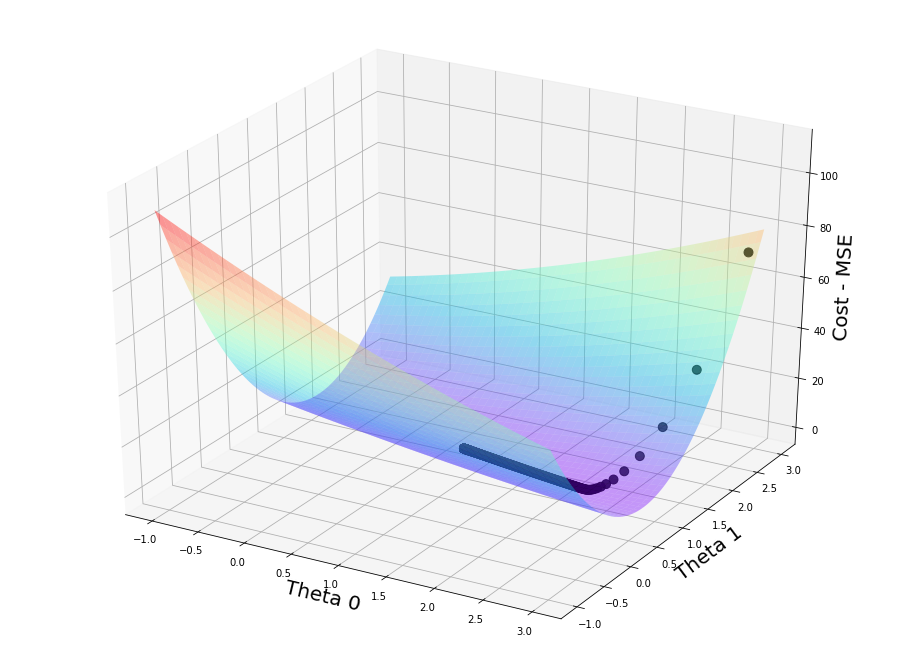

In [43]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()